In [604]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#format original data and concatenate return
def compute_ret(df):
    log_ret = df['Adj Close'].apply(np.log).diff().fillna(0).to_frame()
    sim_ret = df['Adj Close'].pct_change().fillna(0).to_frame()
    log_ret.columns = ['Log Ret']
    sim_ret.columns = ['Simple Ret']
    return pd.concat([df, log_ret, sim_ret], axis=1)

df_aapl = pd.read_csv(r'AAPL.csv', index_col='Date').iloc[0:-4]
df_aapl.index = pd.to_datetime(df_aapl.index, format='%Y-%m-%d')

df_ibm = pd.read_csv(r'IBM.csv', index_col='Date').iloc[0:-4]
df_ibm.index = pd.to_datetime(df_ibm.index, format='%Y-%m-%d')

df_jpm = pd.read_csv(r'JPM.csv', index_col='Date').iloc[0:-4]
df_jpm.index = pd.to_datetime(df_jpm.index, format='%Y-%m-%d')

df_dji = pd.read_csv(r'DJI.csv', index_col='Date').iloc[0:-4]
df_dji.index = pd.to_datetime(df_dji.index, format='%Y-%m-%d')

df_aapl = compute_ret(df_aapl)
df_ibm = compute_ret(df_ibm)
df_jpm = compute_ret(df_jpm)
df_dji = compute_ret(df_dji)

#add outliers to original data
def add_outlier(df):
    temp_df = df.copy()
    outlier = 1.2 * df['Adj Close'].max()
    temp_df['Adj Close'].loc['2018-05-14'] = outlier
    temp_df['Adj Close'].loc['2018-09-14'] = outlier
    temp_df['Adj Close'].loc['2018-12-14'] = outlier
    temp_df['Adj Close'].loc['2019-01-14'] = outlier
    return temp_df

outlier_aapl = add_outlier(df_aapl)
outlier_ibm = add_outlier(df_ibm)
outlier_jpm = add_outlier(df_jpm)
outlier_dji = add_outlier(df_dji)

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [605]:
#question1

from sklearn.linear_model import LinearRegression

def ols_linreg(X, y):
    X = sm.add_constant(X)
    model = LinearRegression().fit(X, y)
    score = model.score(X, y)
    return model, score

def tabulate_res(aapl_reg, aapl_reg_score, ibm_reg, ibm_reg_score, jpm_reg, jpm_reg_score):
    return pd.DataFrame({
        'coef': [aapl_reg.coef_[1], ibm_reg.coef_[1], jpm_reg.coef_[1]], 
        'intercept': [aapl_reg.intercept_, ibm_reg.intercept_, jpm_reg.intercept_],
        'score': [aapl_reg_score, ibm_reg_score, jpm_reg_score]
    }, index=['AAPL', 'IBM', 'JPM'])

In [606]:
aapl_linreg, aapl_linreg_score = ols_linreg(df_dji.iloc[1:]['Simple Ret'], df_aapl.iloc[1:]['Simple Ret'])
ibm_linreg, ibm_linreg_score = ols_linreg(df_dji.iloc[1:]['Simple Ret'], df_ibm.iloc[1:]['Simple Ret'])
jpm_linreg, jpm_linreg_score = ols_linreg(df_dji.iloc[1:]['Simple Ret'], df_jpm.iloc[1:]['Simple Ret'])

lin_reg_res = tabulate_res(aapl_linreg, aapl_linreg_score, ibm_linreg, ibm_linreg_score, jpm_linreg, jpm_linreg_score)
lin_reg_res

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,intercept,score
AAPL,1.327464,0.000047,0.518874
IBM,0.961929,-0.000468,0.418597
JPM,0.930549,-0.000377,0.556493


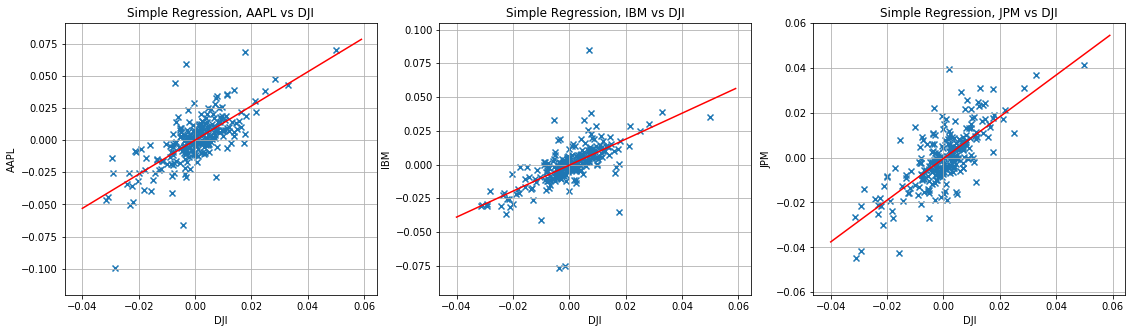

In [607]:
#range of DJI
x = np.arange(-0.04,0.06,0.001)

fig = plt.figure(figsize=(19,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(df_dji.iloc[1:]['Simple Ret'], df_aapl.iloc[1:]['Simple Ret'], marker="x")

ax1.plot(x, lin_reg_res["coef"]["AAPL"]*x+ lin_reg_res["intercept"]["AAPL"], color = "red")
ax1.grid()
ax1.set_ylabel("AAPL")
ax1.set_xlabel("DJI")
ax1.set_title("Simple Regression, AAPL vs DJI")

ax2.scatter(df_dji.iloc[1:]['Simple Ret'], df_ibm.iloc[1:]['Simple Ret'], marker="x")
ax2.plot(x, lin_reg_res["coef"]["IBM"]*x+ lin_reg_res["intercept"]["IBM"], color = "red")
ax2.grid()
ax2.set_ylabel("IBM")
ax2.set_xlabel("DJI")
ax2.set_title("Simple Regression, IBM vs DJI")

ax3.scatter(df_dji.iloc[1:]['Simple Ret'], df_jpm.iloc[1:]['Simple Ret'], marker="x")
ax3.plot(x, lin_reg_res["coef"]["JPM"]*x+ lin_reg_res["intercept"]["JPM"], color = "red")
ax3.grid()
ax3.set_ylabel("JPM")
ax3.set_xlabel("DJI")
ax3.set_title("Simple Regression, JPM vs DJI")

plt.savefig("images//dji_simple_regression")

In [608]:
#question 2
from sklearn.linear_model import HuberRegressor

def huber_linreg(X, y, y_norm, epsilon=1.35):
    X = sm.add_constant(X)
    model = HuberRegressor(epsilon=epsilon).fit(X, y)
    score = model.score(X, y_norm)
    return model, score

aapl_huber_reg, aapl_huber_score = huber_linreg(df_dji['Simple Ret'], df_aapl['Simple Ret'], df_aapl['Simple Ret'])
ibm_huber_reg, ibm_huber_score = huber_linreg(df_dji['Simple Ret'], df_ibm['Simple Ret'], df_ibm['Simple Ret'])
jpm_huber_reg, jpm_huber_score = huber_linreg(df_dji['Simple Ret'], df_jpm['Simple Ret'], df_jpm['Simple Ret'])

huber_reg_res = tabulate_res(aapl_huber_reg, aapl_huber_score, ibm_huber_reg, ibm_huber_score, jpm_huber_reg, jpm_huber_score)
huber_reg_res

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,intercept,score
AAPL,1.272508,-0.000136,0.517697
IBM,0.976089,-0.000266,0.418488
JPM,0.918433,-0.000439,0.554913


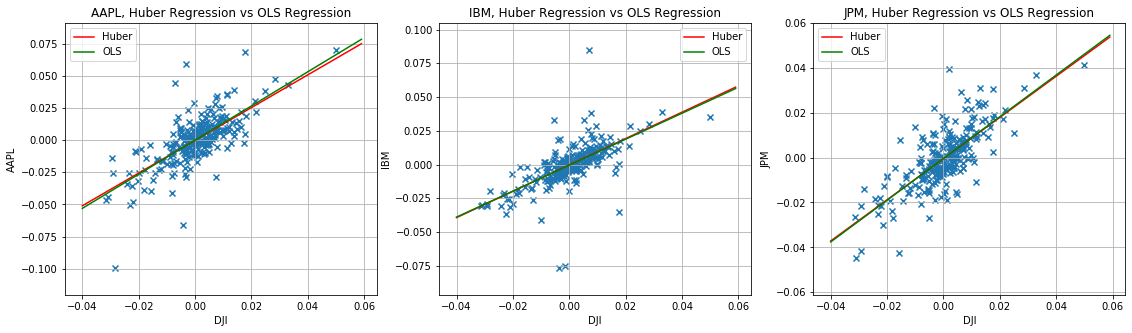

In [609]:
#range of DJI
x = np.arange(-0.04,0.06,0.001)

fig = plt.figure(figsize=(19,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(df_dji.iloc[1:]['Simple Ret'], df_aapl.iloc[1:]['Simple Ret'], marker="x")
ax1.plot(x, huber_reg_res["coef"]["AAPL"]*x+ huber_reg_res["intercept"]["AAPL"], color = "red", label = "Huber")
ax1.plot(x, lin_reg_res["coef"]["AAPL"]*x+ lin_reg_res["intercept"]["AAPL"], color = "green", label = "OLS")
ax1.grid()
ax1.set_ylabel("AAPL")
ax1.set_xlabel("DJI")
ax1.set_title("AAPL, Huber Regression vs OLS Regression")
ax1.legend()

ax2.scatter(df_dji.iloc[1:]['Simple Ret'], df_ibm.iloc[1:]['Simple Ret'], marker="x")
ax2.plot(x, huber_reg_res["coef"]["IBM"]*x+ huber_reg_res["intercept"]["IBM"], color = "red", label = "Huber")
ax2.plot(x, lin_reg_res["coef"]["IBM"]*x+ lin_reg_res["intercept"]["IBM"], color = "green", label = "OLS")
ax2.grid()
ax2.set_ylabel("IBM")
ax2.set_xlabel("DJI")
ax2.set_title("IBM, Huber Regression vs OLS Regression")
ax2.legend()

ax3.scatter(df_dji.iloc[1:]['Simple Ret'], df_jpm.iloc[1:]['Simple Ret'], marker="x")
ax3.plot(x, huber_reg_res["coef"]["JPM"]*x+ huber_reg_res["intercept"]["JPM"], color = "red", label = "Huber")
ax3.plot(x, lin_reg_res["coef"]["JPM"]*x+ lin_reg_res["intercept"]["JPM"], color = "green", label = "OLS")
ax3.grid()
ax3.set_ylabel("JPM")
ax3.set_xlabel("DJI")
ax3.set_title("JPM, Huber Regression vs OLS Regression")
ax3.legend()

plt.savefig("images//dji_huber_regression")

In [610]:
def add_outlier(df, outlier_percentage):
    date_list = df['Adj Close'].sample(frac=outlier_percentage).index
    temp_df = df[df.columns[0:-2]].copy()
    for d in date_list:
        temp_df['Adj Close'].loc[d] = (np.random.uniform(1.3, 2)) * df['Adj Close'].max()
    return temp_df

outlier_aapl = compute_ret(add_outlier(df_aapl, 0.2))
outlier_ibm = compute_ret(add_outlier(df_ibm, 0.2))
outlier_jpm = compute_ret(add_outlier(df_jpm, 0.2))

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [611]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

#perform analysis on data with outliers

def huber_vs_ols(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    ols_model = LinearRegression().fit(sm.add_constant(X_train), y_train)
    ols_predictions = ols_model.predict(sm.add_constant(X_test))
    ols_train_error = mse(y_train, X_train*ols_model.coef_[1] + ols_model.intercept_)
    ols_test_error = mse(y_test, ols_predictions)
    
    huber_model = HuberRegressor(epsilon=1.35).fit(sm.add_constant(X_train), y_train)
    huber_predictions = huber_model.predict(sm.add_constant(X_test))
    huber_train_error = mse(y_train, X_train*huber_model.coef_[1] + huber_model.intercept_)
    huber_test_error = mse(y_test, huber_predictions)
    
    return [ols_train_error, ols_test_error, huber_train_error, huber_test_error]
    
aapl_error = huber_vs_ols(df_dji.iloc[1:]['Simple Ret'], outlier_aapl.iloc[1:]['Simple Ret'])   
ibm_error = huber_vs_ols(df_dji.iloc[1:]['Simple Ret'], outlier_ibm.iloc[1:]['Simple Ret'])   
jpm_error = huber_vs_ols(df_dji.iloc[1:]['Simple Ret'], outlier_jpm.iloc[1:]['Simple Ret'])   

error_map = {
    "AAPL": aapl_error,
    "IBM": ibm_error,
    "JPM": jpm_error
}
error_summary = pd.DataFrame(error_map, index = ["OLS Training Error", "OLS Test Error", "Huber Training Error", "Huber Test Error"])
mean_error = pd.DataFrame(error_summary.mean(axis = 1), columns = ["Mean"])
error_summary = pd.concat([error_summary, mean_error], axis = 1)

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python

In [612]:
error_summary

,AAPL,IBM,JPM,Mean
OLS Training Error,0.191910,0.160743,0.129132,0.160595
OLS Test Error,0.239409,0.218829,0.076199,0.178146
Huber Training Error,0.196935,0.168618,0.134928,0.166827
Huber Test Error,0.248774,0.214393,0.065880,0.176349


In [613]:
#perform analysis on original data

aapl_error = huber_vs_ols(df_dji.iloc[1:]['Simple Ret'], df_aapl.iloc[1:]['Simple Ret'])   
ibm_error = huber_vs_ols(df_dji.iloc[1:]['Simple Ret'], df_ibm.iloc[1:]['Simple Ret'])   
jpm_error = huber_vs_ols(df_dji.iloc[1:]['Simple Ret'], df_jpm.iloc[1:]['Simple Ret'])   

error_map = {
    "AAPL": aapl_error,
    "IBM": ibm_error,
    "JPM": jpm_error
}
error_summary = pd.DataFrame(error_map, index = ["OLS Training Error", "OLS Test Error", "Huber Training Error", "Huber Test Error"])
mean_error = pd.DataFrame(error_summary.mean(axis = 1), columns = ["Mean"])
error_summary = pd.concat([error_summary, mean_error], axis = 1)

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python

In [614]:
error_summary

,AAPL,IBM,JPM,Mean
OLS Training Error,0.000160,0.000129,0.000078,0.000123
OLS Test Error,0.000275,0.000194,0.000070,0.000180
Huber Training Error,0.000162,0.000129,0.000078,0.000123
Huber Test Error,0.000265,0.000194,0.000071,0.000177


In [615]:
outlier_aapl_linreg, outlier_aapl_linreg_score = ols_linreg(df_dji.iloc[1:]['Simple Ret'], outlier_aapl.iloc[1:]['Simple Ret'])
outlier_ibm_linreg, outlier_ibm_linreg_score = ols_linreg(df_dji.iloc[1:]['Simple Ret'], outlier_ibm.iloc[1:]['Simple Ret'])
outlier_jpm_linreg, outlier_jpm_linreg_score = ols_linreg(df_dji.iloc[1:]['Simple Ret'], outlier_jpm.iloc[1:]['Simple Ret'])

outlier_lin_reg_res = tabulate_res(outlier_aapl_linreg, outlier_aapl_linreg_score, outlier_ibm_linreg, outlier_ibm_linreg_score, outlier_jpm_linreg, outlier_jpm_linreg_score)
outlier_lin_reg_res

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,intercept,score
AAPL,0.235112,0.080533,0.000030
IBM,-3.016445,0.070747,0.005850
JPM,3.591011,0.047840,0.011971


In [616]:
outlier_aapl_huber_reg, outlier_aapl_huber_score = huber_linreg(df_dji['Simple Ret'], outlier_aapl['Simple Ret'], outlier_aapl['Simple Ret'])
outlier_ibm_huber_reg, outlier_ibm_huber_score = huber_linreg(df_dji['Simple Ret'], outlier_ibm['Simple Ret'], outlier_ibm['Simple Ret'])
outlier_jpm_huber_reg, outlier_jpm_huber_score = huber_linreg(df_dji['Simple Ret'], outlier_jpm['Simple Ret'], outlier_jpm['Simple Ret'])


outlier_huber_reg_res = tabulate_res(outlier_aapl_huber_reg, outlier_aapl_huber_score, outlier_ibm_huber_reg, outlier_ibm_huber_score, outlier_jpm_huber_reg, outlier_jpm_huber_score)
outlier_huber_reg_res

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,intercept,score
AAPL,1.046414,0.000359,-0.031778
IBM,0.903814,-0.000136,-0.032636
JPM,1.009666,-0.000353,-0.014237


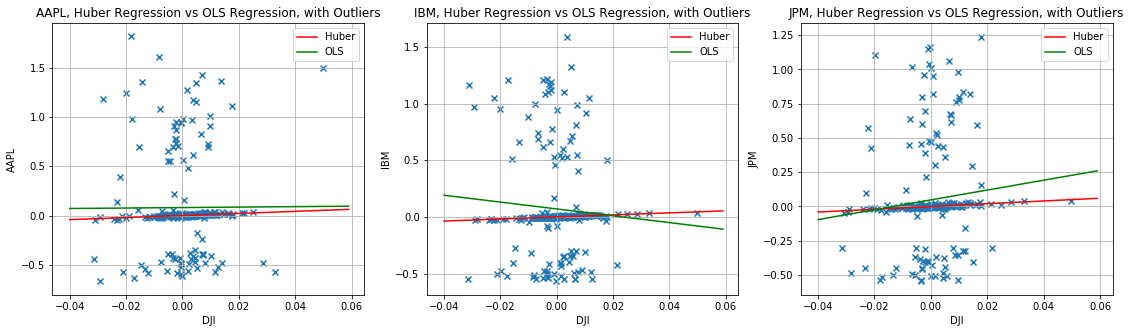

In [617]:
x = np.arange(-0.04,0.06,0.001)

fig = plt.figure(figsize=(19,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(df_dji.iloc[1:]['Simple Ret'], outlier_aapl.iloc[1:]['Simple Ret'], marker="x")
ax1.plot(x, outlier_huber_reg_res["coef"]["AAPL"]*x+ outlier_huber_reg_res["intercept"]["AAPL"], color = "red", label = "Huber")
ax1.plot(x, outlier_lin_reg_res["coef"]["AAPL"]*x+ outlier_lin_reg_res["intercept"]["AAPL"], color = "green", label = "OLS")
ax1.grid()
ax1.set_ylabel("AAPL")
ax1.set_xlabel("DJI")
ax1.set_title("AAPL, Huber Regression vs OLS Regression, with Outliers")
ax1.legend()

ax2.scatter(df_dji.iloc[1:]['Simple Ret'], outlier_ibm.iloc[1:]['Simple Ret'], marker="x")
ax2.plot(x, outlier_huber_reg_res["coef"]["IBM"]*x+ outlier_huber_reg_res["intercept"]["IBM"], color = "red", label = "Huber")
ax2.plot(x, outlier_lin_reg_res["coef"]["IBM"]*x+ outlier_lin_reg_res["intercept"]["IBM"], color = "green", label = "OLS")
ax2.grid()
ax2.set_ylabel("IBM")
ax2.set_xlabel("DJI")
ax2.set_title("IBM, Huber Regression vs OLS Regression, with Outliers")
ax2.legend()

ax3.scatter(df_dji.iloc[1:]['Simple Ret'], outlier_jpm.iloc[1:]['Simple Ret'], marker="x")
ax3.plot(x, outlier_huber_reg_res["coef"]["JPM"]*x+ outlier_huber_reg_res["intercept"]["JPM"], color = "red", label = "Huber")
ax3.plot(x, outlier_lin_reg_res["coef"]["JPM"]*x+ outlier_lin_reg_res["intercept"]["JPM"], color = "green", label = "OLS")
ax3.grid()
ax3.set_ylabel("JPM")
ax3.set_xlabel("DJI")
ax3.set_title("JPM, Huber Regression vs OLS Regression, with Outliers")
ax3.legend()

plt.savefig("images//outlier_dji_huber_regression")

In [618]:
lin_percentage_change = np.abs(outlier_lin_reg_res - lin_reg_res/lin_reg_res)*100
lin_percentage_change.mean()

coef         245.744790
intercept     93.362700
score         99.404976
dtype: float64

In [619]:
huber_percentage_change = np.abs(outlier_huber_reg_res - huber_reg_res/huber_reg_res)*100
huber_percentage_change.mean()

coef           5.075519
intercept    100.004346
score        102.621698
dtype: float64

In [620]:
lin_percentage_change

,coef,intercept,score
AAPL,76.488785,91.946750,99.996954
IBM,401.644468,92.925314,99.415036
JPM,259.101116,95.216036,98.802940


In [621]:
huber_percentage_change

,coef,intercept,score
AAPL,4.641351,99.964096,103.177761
IBM,9.618628,100.013638,103.263645
JPM,0.966580,100.035304,101.423688
